In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


標準化なしの寄与率: [0.89540627 0.10459373]
標準化ありの寄与率: [0.89537539 0.10462461]


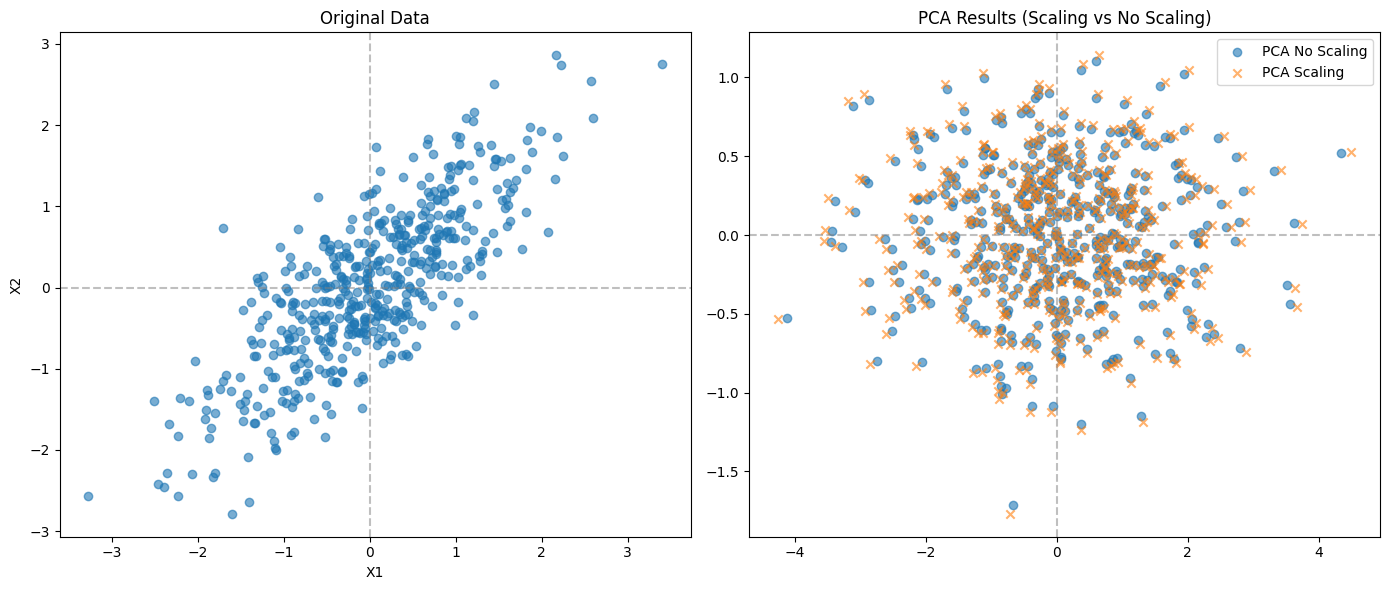

In [2]:

# データ生成：相関係数0.8を持つ2次元データ
mean = [0, 0]  # 平均
cov = [[1, 0.8], [0.8, 1]]  # 共分散行列（相関0.8）
np.random.seed(42)
data = np.random.multivariate_normal(mean, cov, size=500)
df = pd.DataFrame(data, columns=["X1", "X2"])

# PCA（標準化なし）
pca_no_scaling = PCA()
pca_no_scaling_result = pca_no_scaling.fit_transform(df)

# 標準化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# PCA（標準化あり）
pca_scaling = PCA()
pca_scaling_result = pca_scaling.fit_transform(data_scaled)

# 主成分の寄与率比較
print("標準化なしの寄与率:", pca_no_scaling.explained_variance_ratio_)
print("標準化ありの寄与率:", pca_scaling.explained_variance_ratio_)

# 可視化
plt.figure(figsize=(14, 6))

# オリジナルデータ
plt.subplot(1, 2, 1)
plt.scatter(df["X1"], df["X2"], alpha=0.6, label="Original Data")
plt.title("Original Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)

# PCA後のデータ
plt.subplot(1, 2, 2)
plt.scatter(pca_no_scaling_result[:, 0], pca_no_scaling_result[:, 1], alpha=0.6, label="PCA No Scaling")
plt.scatter(pca_scaling_result[:, 0], pca_scaling_result[:, 1], alpha=0.6, label="PCA Scaling", marker="x")
plt.title("PCA Results (Scaling vs No Scaling)")
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()